In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# Make the request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"
}

response = requests.get('https://www.airlinequality.com/airline-reviews/british-airways/page/1/', headers=headers)


In [3]:
# Extract the content from the Response object
webpage_content = response.content

In [4]:
# Parse the content with BeautifulSoup
soup=BeautifulSoup(webpage_content,'lxml')

In [5]:
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]--><!--[if gt IE 8]><!--><html lang="en-GB">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title><link as="image" fetchpriority="high" href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/nav/grad-header.jpg" rel="preload"/>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <link as="image" fetchpriority="high" href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/nav/grad-header.jpg" rel="preload"/>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, us

In [7]:
reviews =soup.find_all('div', class_='text_content')

In [8]:
for review in reviews:
    print(review.text)

Not Verified |   On March 1st, I flew from Berlin to São Paulo with BA but encountered several issues. My first flight was delayed by several hours, causing me to miss my connection at London Heathrow. Upon arriving at the airport after midnight, I was given a hotel voucher. However, the hotel designated by BA rudely denied me check-in, claiming it was fully booked. I had to return to Heathrow at 1 AM and found a different hotel, paying for the taxi out of my own pocket. As a result of these complications, I arrived in São Paulo more than 24 hours late. Despite my efforts to assert my rights and seek reimbursement for the taxi, BA's customer service has been extremely poor. Their phone lines are non-functional, emails are only answered automatically, and the appropriate channels for such requests have not been responsive since the first week of March. This experience has left me extremely disappointed, especially considering the high standard of service I once associated with BA.
Not V

In [9]:
len(review)

3

In [10]:
TravellerType= soup.find_all('td', class_='review-rating-header type_of_traveller')

In [11]:
len(TravellerType)

10

In [12]:
for type in TravellerType:
    print(type.text)

Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller
Type Of Traveller


In [13]:
cards =soup.find_all('div', class_='tc_mobile')

In [14]:
len(cards)

10

In [15]:
for card in cards:
    print(card.text)


Not Verified |   On March 1st, I flew from Berlin to São Paulo with BA but encountered several issues. My first flight was delayed by several hours, causing me to miss my connection at London Heathrow. Upon arriving at the airport after midnight, I was given a hotel voucher. However, the hotel designated by BA rudely denied me check-in, claiming it was fully booked. I had to return to Heathrow at 1 AM and found a different hotel, paying for the taxi out of my own pocket. As a result of these complications, I arrived in São Paulo more than 24 hours late. Despite my efforts to assert my rights and seek reimbursement for the taxi, BA's customer service has been extremely poor. Their phone lines are non-functional, emails are only answered automatically, and the appropriate channels for such requests have not been responsive since the first week of March. This experience has left me extremely disappointed, especially considering the high standard of service I once associated with BA.


Ty

In [16]:
review=[]
TravellerType=[]
SeatType=[]
DateFlown=[]

for i in cards:
    review.append(i.find('div', class_='text_content').text.strip())
    TravellerType.append(i.find_all('td', class_='review-value')[0].text.strip())

In [17]:
review

["Not Verified |\xa0 \xa0On March 1st, I flew from Berlin to São Paulo with BA but encountered several issues. My first flight was delayed by several hours, causing me to miss my connection at London Heathrow. Upon arriving at the airport after midnight, I was given a hotel voucher. However, the hotel designated by BA rudely denied me check-in, claiming it was fully booked. I had to return to Heathrow at 1 AM and found a different hotel, paying for the taxi out of my own pocket. As a result of these complications, I arrived in São Paulo more than 24 hours late. Despite my efforts to assert my rights and seek reimbursement for the taxi, BA's customer service has been extremely poor. Their phone lines are non-functional, emails are only answered automatically, and the appropriate channels for such requests have not been responsive since the first week of March. This experience has left me extremely disappointed, especially considering the high standard of service I once associated with B

In [18]:
TravellerType

['Business',
 'Couple Leisure',
 'Solo Leisure',
 'Couple Leisure',
 'A320',
 'A350-1000',
 'A350-1000',
 'A320/A380',
 'Couple Leisure',
 'Boeing 777']

In [19]:
#creating final data frame with all the reviews only.

final=pd.DataFrame()

for j in range(1,384):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"}
    response = requests.get('https://www.airlinequality.com/airline-reviews/british-airways/page/{}/'.format(j), headers=headers)
    webpage_content = response.content
    soup=BeautifulSoup(webpage_content,'lxml')
    cards =soup.find_all('div', class_='tc_mobile')
    
    review = []
    for i in cards:
        review.append(i.find('div', class_='text_content').text.strip())
    # Create a DataFrame from the review list
    df=pd.DataFrame({'reviews':review})
    
    # Concatenate the new DataFrame with the final DataFrame
    final = pd.concat([final, df], ignore_index=True)




In [20]:
final.shape

(3822, 1)

In [21]:
final.to_csv('reviews.csv', index=False)


In [22]:
final.head

<bound method NDFrame.head of                                                 reviews
0     Not Verified |   On March 1st, I flew from Ber...
1     Not Verified | The WORST customer experience! ...
2     Not Verified |   Had to cancel my flight month...
3     ✅ Trip Verified | Flight cancelled with no rea...
4     ✅ Trip Verified | This is a route I fly regula...
...                                                 ...
3817  Flew LHR - VIE return operated by bmi but BA a...
3818  LHR to HAM. Purser addresses all club passenge...
3819  My son who had worked for British Airways urge...
3820  London City-New York JFK via Shannon on A318 b...
3821  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3822 rows x 1 columns]>

In [23]:
final

,reviews
0,"Not Verified | On March 1st, I flew from Ber..."
1,Not Verified | The WORST customer experience! ...
2,Not Verified | Had to cancel my flight month...
3,✅ Trip Verified | Flight cancelled with no rea...
4,✅ Trip Verified | This is a route I fly regula...
...,...
3817,Flew LHR - VIE return operated by bmi but BA a...
3818,LHR to HAM. Purser addresses all club passenge...
3819,My son who had worked for British Airways urge...
3820,London City-New York JFK via Shannon on A318 b...


Sentiment Analysis

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import nltk

In [25]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import pipeline

In [30]:
pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 1.4 MB/s eta 0:00:0000:0100:03
Note: you may need to restart the kernel to use updated packages.


In [3]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [7]:
reviews = pd.read_csv('reviews.csv')

In [12]:
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srishtisingh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.word_tokenize('She is cute')

['She', 'is', 'cute']

Step 1. VADER Seniment Scoring<br>
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.<br>
• This uses a "bag of words" approach:
1. Stop words are removed
2. each word is scored and combined to a total score.

In [15]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample text
text = "She is cute"

# Get the sentiment scores
scores = sia.polarity_scores(text)
print(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srishtisingh/nltk_data...


{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}


In [28]:
sia.polarity_scores(reviews.iloc[0]['reviews'])['neg']

0.138

In [25]:
sia.polarity_scores(reviews.iloc[1]['reviews'])

{'neg': 0.176, 'neu': 0.694, 'pos': 0.13, 'compound': -0.7062}

In [32]:
negative = []
neutral = []
positive = []
compound = []

for i in range(0,3822):
    negative.append(sia.polarity_scores(reviews.iloc[i]['reviews'])['neg'])
    neutral.append(sia.polarity_scores(reviews.iloc[i]['reviews'])['neu'])
    positive.append(sia.polarity_scores(reviews.iloc[i]['reviews'])['pos'])
    compound.append(sia.polarity_scores(reviews.iloc[i]['reviews'])['compound'])

In [34]:
sentiment = pd.DataFrame({
    'neg':negative,
    'neu': neutral,
    'pos': positive,
    'compound': compound})

In [39]:
sentiment.shape

(3822, 4)

In [40]:
sentiment.to_csv('sentiment.csv', index=False)

In [41]:
# Concatenate the DataFrames along the columns
final = pd.concat([reviews, sentiment], axis=1)

# Save the result to a new CSV file
final.to_csv('final.csv', index=False)


In [42]:
# Count negative, positive, and zero values
num_negative = sentiment[sentiment['compound'] < 0]['compound'].count()
num_positive = sentiment[sentiment['compound'] > 0]['compound'].count()
num_zero = sentiment[sentiment['compound'] == 0]['compound'].count()

In [43]:
num_negative

1589

In [44]:
num_positive

2222

In [45]:
num_zero

11

In [46]:
# Calculate percentages
total_values = sentiment['compound'].count()  # Total number of values in the column

percentage_negative = (num_negative / total_values) * 100
percentage_positive = (num_positive / total_values) * 100
percentage_zero = (num_zero / total_values) * 100

In [47]:
percentage_negative


41.57509157509158

In [48]:
percentage_positive

58.13710099424385

In [49]:
percentage_zero

0.28780743066457354

In [50]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srishtisingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srishtisingh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
# Initialize stop words
stop_words = set(stopwords.words('english'))


In [52]:
# Tokenize and remove stop words
all_words = []
for review in reviews['reviews']:
    words = word_tokenize(review.lower())  # Convert to lowercase and tokenize
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stop words and non-alphabetic tokens
    all_words.extend(words)

In [53]:
# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

In [54]:
top_20_words

[('flight', 6931),
 ('ba', 4987),
 ('service', 2908),
 ('seat', 2395),
 ('food', 2373),
 ('verified', 2284),
 ('crew', 2225),
 ('british', 2224),
 ('london', 2219),
 ('airways', 2198),
 ('seats', 2139),
 ('time', 2137),
 ('good', 2109),
 ('cabin', 2049),
 ('class', 1964),
 ('trip', 1746),
 ('one', 1672),
 ('would', 1659),
 ('business', 1639),
 ('staff', 1598)]

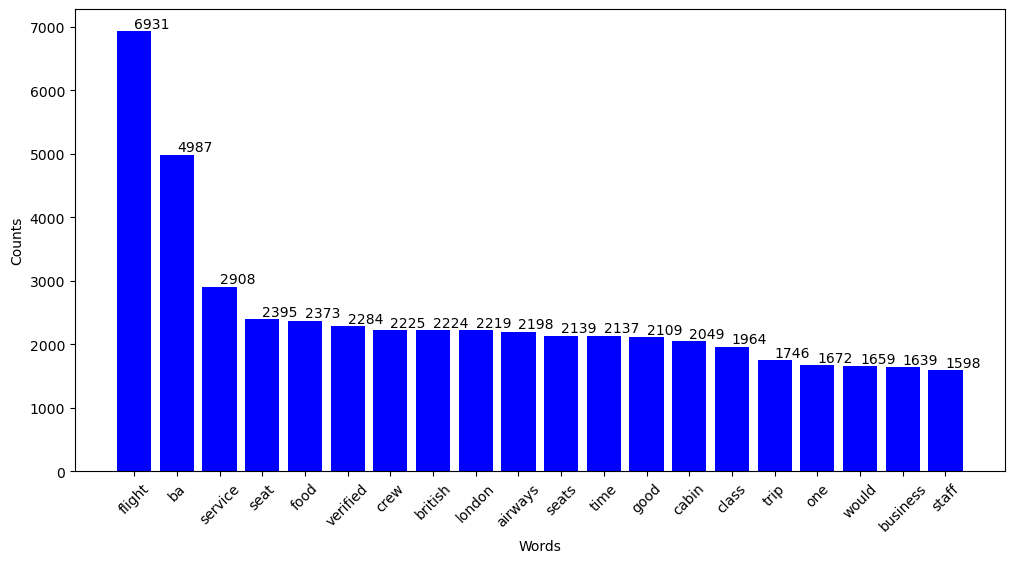

In [62]:
# Separate words and their counts for plotting
words, counts = zip(*top_20_words)

# Plot the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)

# Display numbers above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va='bottom' to place the text above the bar

plt.show()